## ARIMA pre-processing

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Read file and return a pd.Series()

In [56]:
data = pd.read_csv("facebook.csv", index_col=0, squeeze=True)

<AxesSubplot:xlabel='Date'>

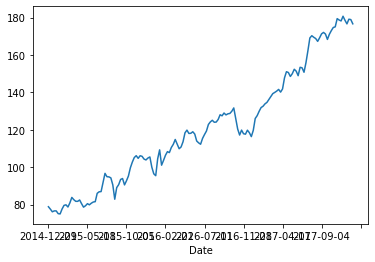

In [57]:
data.plot()

## Split the data into a training and test part

In [35]:
# dataTrain = data[:"2017-01-01"]
# dataTrain.plot()

# dataTest = data["2017-01-01":]
# dataTest.plot()

## Do a augmented Dickey-Fuller test

(0.17227611232743184,
 0.9706630685458876,
 2,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 677.9386750403336)

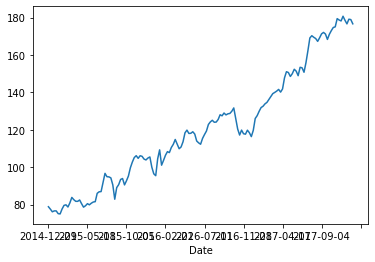

In [58]:
data.plot()
resAd = adfuller(data)
resAd

## And one with a one-lag differences dataset

(-10.307161545864284,
 3.256132261115787e-18,
 1,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 672.1242054140864)

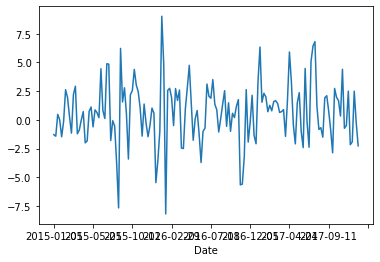

In [64]:
diffData = data-data.shift(1)
diffData = diffData.dropna()
diffData.plot()
adfuller(diffData)

## Plot PACF using the differenced to determine AR

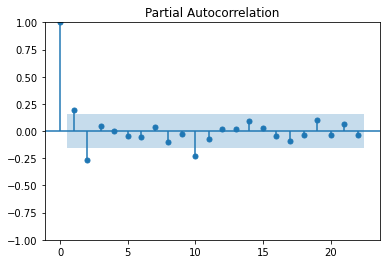

In [69]:
plot_pacf(diffData, method="ywm");

## Plot ACF using the differenced to determine MA

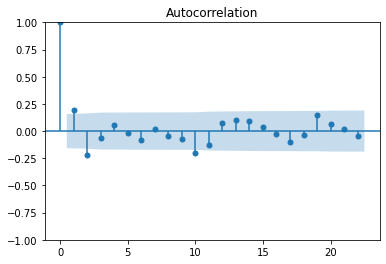

In [71]:
plot_acf(diffData);